<a href="https://colab.research.google.com/github/Dhlih/SMT2_AI/blob/main/Yusuf_Fadhlih_F_4_33_24_1_25_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## 1. Load Dataset

In [17]:
# Muat dataset
try:
    df = pd.read_csv('airbnb.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: airbnb.csv tidak ditemukan. Pastikan file berada di direktori yang benar.")
    exit()



Dataset berhasil dimuat.


#### 1.1 Informasi Dataset

In [18]:
print("\n--- Gambaran Umum Data Awal ---")
print("5 baris pertama dari dataset:")
print(df.head())

print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif untuk Kolom Numerik:")
print(df.describe())


--- Gambaran Umum Data Awal ---
5 baris pertama dari dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0

## 2. Analisis Properti

In [19]:
print("\n--- Analisis Properti Tiap Kolom ---")

for col in df.columns:
    print(f"\n--- Kolom: {col} ---")
    print(f"Tipe Data: {df[col].dtype}")
    total_rows = len(df)
    missing_count = df[col].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Jumlah Baris Total: {total_rows}")
    print(f"Nilai Hilang: {missing_count} ({missing_percentage:.2f}%)")
    print(f"Nilai Unik: {df[col].nunique()}")

    if pd.api.types.is_numeric_dtype(df[col]):
        # Hitung statistik hanya untuk nilai non-null
        series_non_null = df[col].dropna()
        if not series_non_null.empty:
            print(f"Rata-rata (Mean): {series_non_null.mean():.2f}")
            print(f"Median: {series_non_null.median():.2f}")
            print(f"Standar Deviasi: {series_non_null.std():.2f}")
            print(f"Nilai Minimum: {series_non_null.min():.2f}")
            print(f"Nilai Maksimum: {series_non_null.max():.2f}")
            if series_non_null.min() != 0:
                print(f"Perbandingan Max/Min: {(series_non_null.max() / series_non_null.min()):.2f}")
            else:
                print("Perbandingan Max/Min: Tidak berlaku (nilai minimum adalah 0)")
        else:
            print("Tidak ada nilai numerik non-null untuk menghitung statistik.")
    else: # Kolom Kategorikal/Object
        print("5 Nilai Teratas:")
        print(df[col].value_counts().head(5))


--- Analisis Properti Tiap Kolom ---

--- Kolom: id ---
Tipe Data: int64
Jumlah Baris Total: 48895
Nilai Hilang: 0 (0.00%)
Nilai Unik: 48895
Rata-rata (Mean): 19017143.24
Median: 19677284.00
Standar Deviasi: 10983108.39
Nilai Minimum: 2539.00
Nilai Maksimum: 36487245.00
Perbandingan Max/Min: 14370.71

--- Kolom: name ---
Tipe Data: object
Jumlah Baris Total: 48895
Nilai Hilang: 16 (0.03%)
Nilai Unik: 47905
5 Nilai Teratas:
name
Hillside Hotel                  18
Home away from home             17
New york Multi-unit building    16
Brooklyn Apartment              12
Private Room                    11
Name: count, dtype: int64

--- Kolom: host_id ---
Tipe Data: int64
Jumlah Baris Total: 48895
Nilai Hilang: 0 (0.00%)
Nilai Unik: 37457
Rata-rata (Mean): 67620010.65
Median: 30793816.00
Standar Deviasi: 78610967.03
Nilai Minimum: 2438.00
Nilai Maksimum: 274321313.00
Perbandingan Max/Min: 112519.00

--- Kolom: host_name ---
Tipe Data: object
Jumlah Baris Total: 48895
Nilai Hilang: 21 (0.04%)

## 3. Data Cleaning

In [21]:
print("\n--- Penanganan Nilai Hilang ---")

# Isi nilai yang hilang di 'reviews_per_month' dengan 0
# Asumsi: jika tidak ada ulasan, maka tidak ada ulasan per bulan
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Isi nilai yang hilang di 'name' dan 'host_name' dengan 'unknown'
df['name'] = df['name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')

# Kolom 'last_review' memiliki banyak nilai hilang (sekitar 20%)
# Untuk analisis ini, kita tidak akan menggunakannya secara langsung,
# tetapi jika diperlukan, bisa diisi dengan nilai default atau dipertimbangkan untuk analisis temporal.

print("\nJumlah nilai hilang setelah penanganan:")
print(df.isnull().sum())


--- Penanganan Nilai Hilang ---

Jumlah nilai hilang setelah penanganan:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


## 4. Visualisasi Data




#### 4.1 Distribusi Fitur Numerik

###### 4.1.1. Distribusi Harga (price)

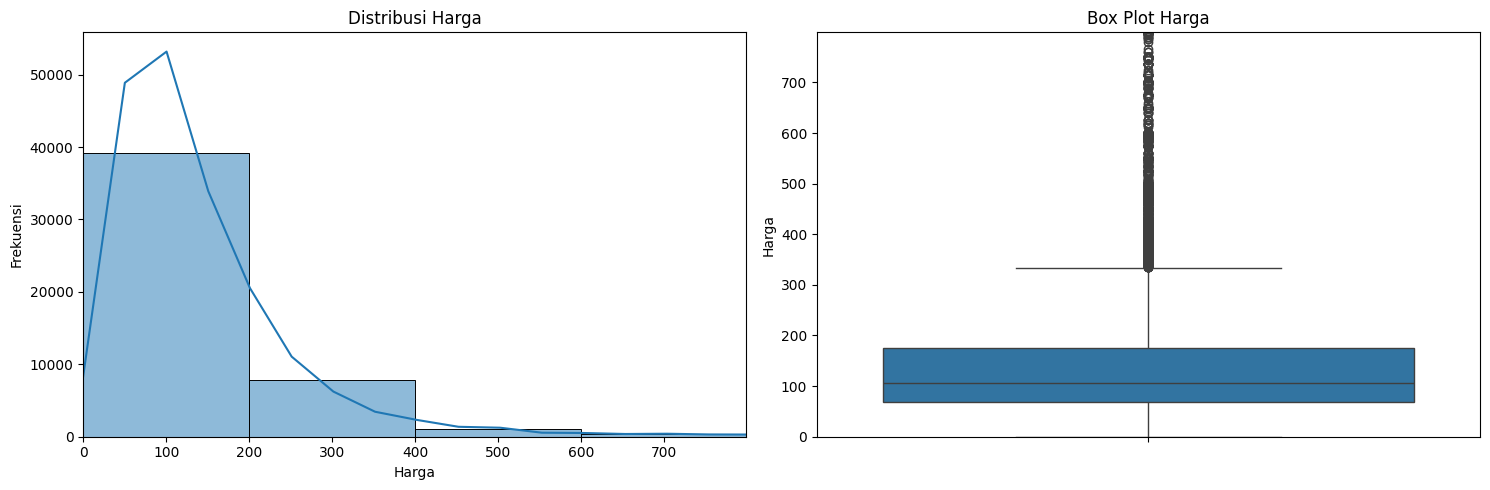

Plot distribusi harga telah dibuat dan disimpan.


In [22]:
# Distribusi Harga
plt.figure(figsize=(15, 5))

# Histogram Harga
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
# Batasi sumbu x hingga persentil ke-99 untuk melihat distribusi utama dengan lebih baik
plt.xlim(0, df['price'].quantile(0.99))
plt.savefig('distribusi_harga_histogram.png')

# Box Plot Harga
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Box Plot Harga')
plt.ylabel('Harga')
# Batasi sumbu y hingga persentil ke-99
plt.ylim(0, df['price'].quantile(0.99))
plt.savefig('distribusi_harga_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi harga telah dibuat dan disimpan.")

###### 4.1.2. Distribusi Minimum Malam Menginap (minimum_nights)

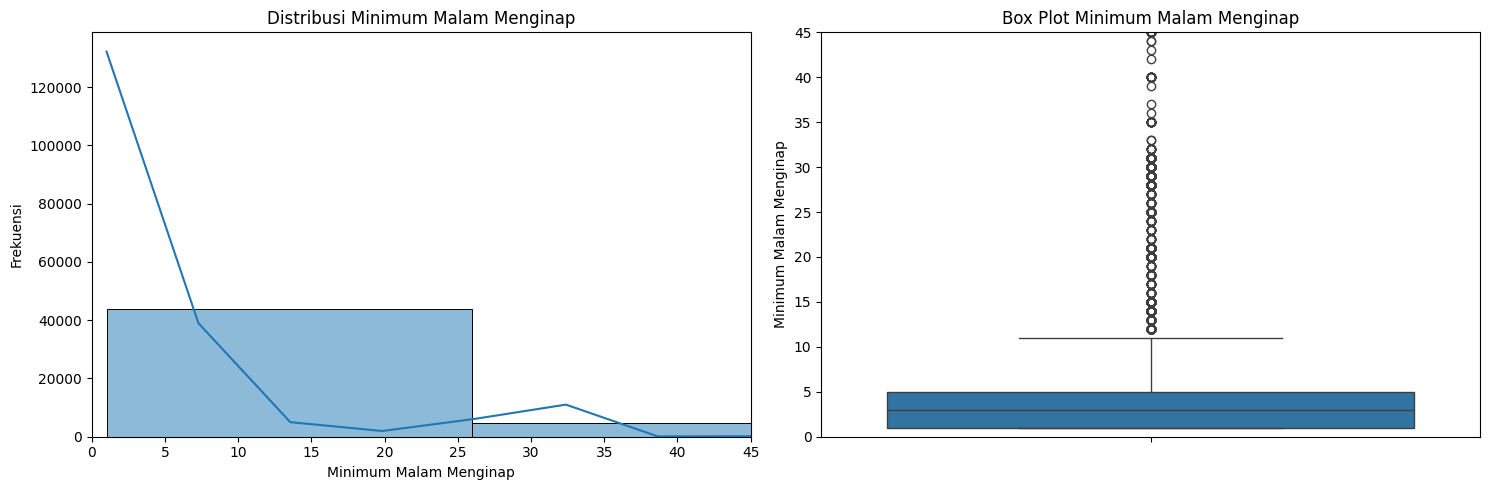

Plot distribusi minimum malam menginap telah dibuat dan disimpan.


In [23]:
# Distribusi Minimum Nights
plt.figure(figsize=(15, 5))

# Histogram Minimum Malam Menginap
plt.subplot(1, 2, 1)
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribusi Minimum Malam Menginap')
plt.xlabel('Minimum Malam Menginap')
plt.ylabel('Frekuensi')
plt.xlim(0, df['minimum_nights'].quantile(0.99))
plt.savefig('distribusi_minimum_malam_histogram.png')

# Box Plot Minimum Malam Menginap
plt.subplot(1, 2, 2)
sns.boxplot(y=df['minimum_nights'])
plt.title('Box Plot Minimum Malam Menginap')
plt.ylabel('Minimum Malam Menginap')
plt.ylim(0, df['minimum_nights'].quantile(0.99))
plt.savefig('distribusi_minimum_malam_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi minimum malam menginap telah dibuat dan disimpan.")

###### 4.1.3. Distribusi Jumlah Ulasan (number_of_reviews)

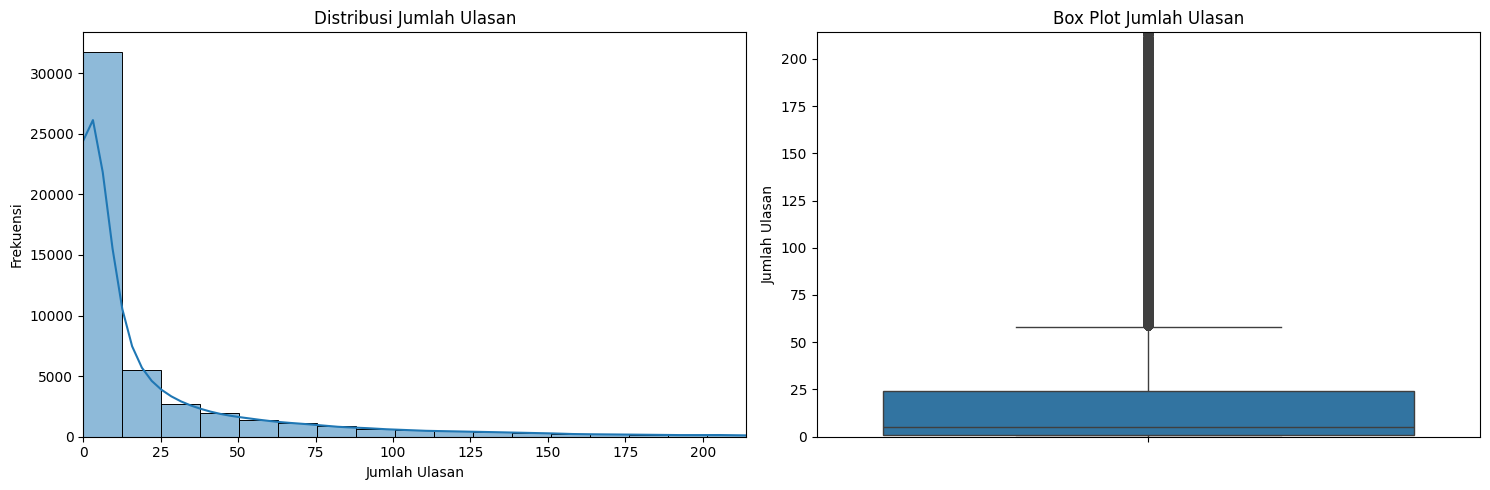

Plot distribusi jumlah ulasan telah dibuat dan disimpan.


In [24]:
# Distribusi Jumlah Ulasan
plt.figure(figsize=(15, 5))

# Histogram Jumlah Ulasan
plt.subplot(1, 2, 1)
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Distribusi Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')
plt.xlim(0, df['number_of_reviews'].quantile(0.99))
plt.savefig('distribusi_jumlah_ulasan_histogram.png')

# Box Plot Jumlah Ulasan
plt.subplot(1, 2, 2)
sns.boxplot(y=df['number_of_reviews'])
plt.title('Box Plot Jumlah Ulasan')
plt.ylabel('Jumlah Ulasan')
plt.ylim(0, df['number_of_reviews'].quantile(0.99))
plt.savefig('distribusi_jumlah_ulasan_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi jumlah ulasan telah dibuat dan disimpan.")

###### 4.1.4. Distribusi Ulasan Per Bulan (reviews_per_month)

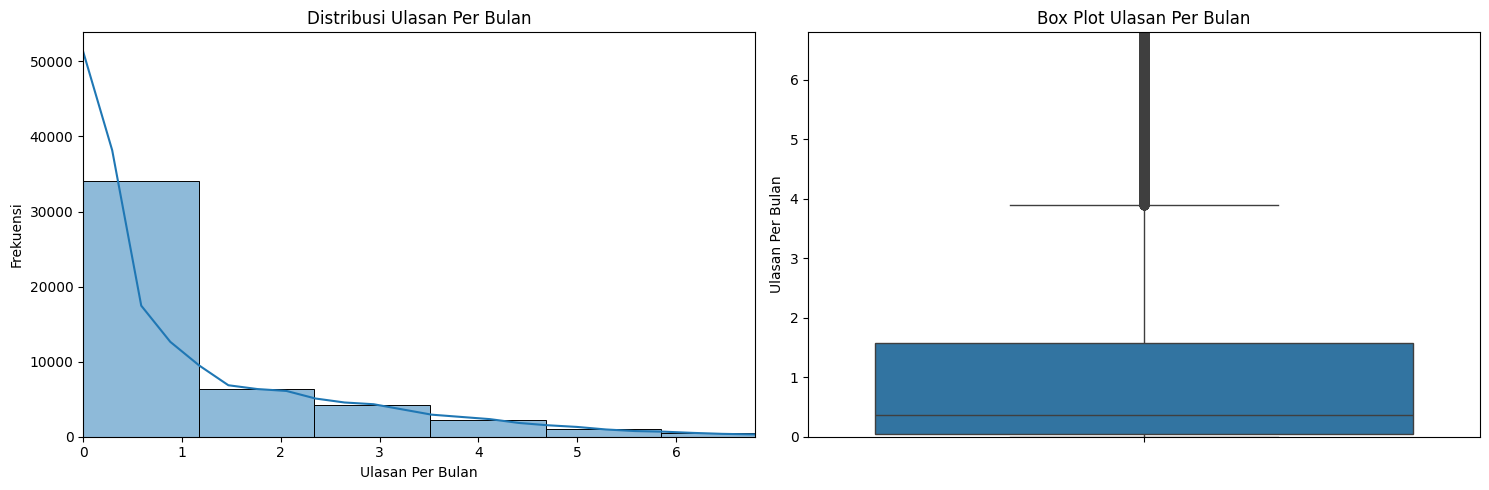

Plot distribusi ulasan per bulan telah dibuat dan disimpan.


In [25]:
# Distribusi Ulasan Per Bulan
plt.figure(figsize=(15, 5))

# Histogram Ulasan Per Bulan
plt.subplot(1, 2, 1)
sns.histplot(df['reviews_per_month'], bins=50, kde=True)
plt.title('Distribusi Ulasan Per Bulan')
plt.xlabel('Ulasan Per Bulan')
plt.ylabel('Frekuensi')
plt.xlim(0, df['reviews_per_month'].quantile(0.99))
plt.savefig('distribusi_ulasan_per_bulan_histogram.png')

# Box Plot Ulasan Per Bulan
plt.subplot(1, 2, 2)
sns.boxplot(y=df['reviews_per_month'])
plt.title('Box Plot Ulasan Per Bulan')
plt.ylabel('Ulasan Per Bulan')
plt.ylim(0, df['reviews_per_month'].quantile(0.99))
plt.savefig('distribusi_ulasan_per_bulan_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi ulasan per bulan telah dibuat dan disimpan.")

###### 4.1.5. Distribusi Ketersediaan 365 Hari (availability_365)

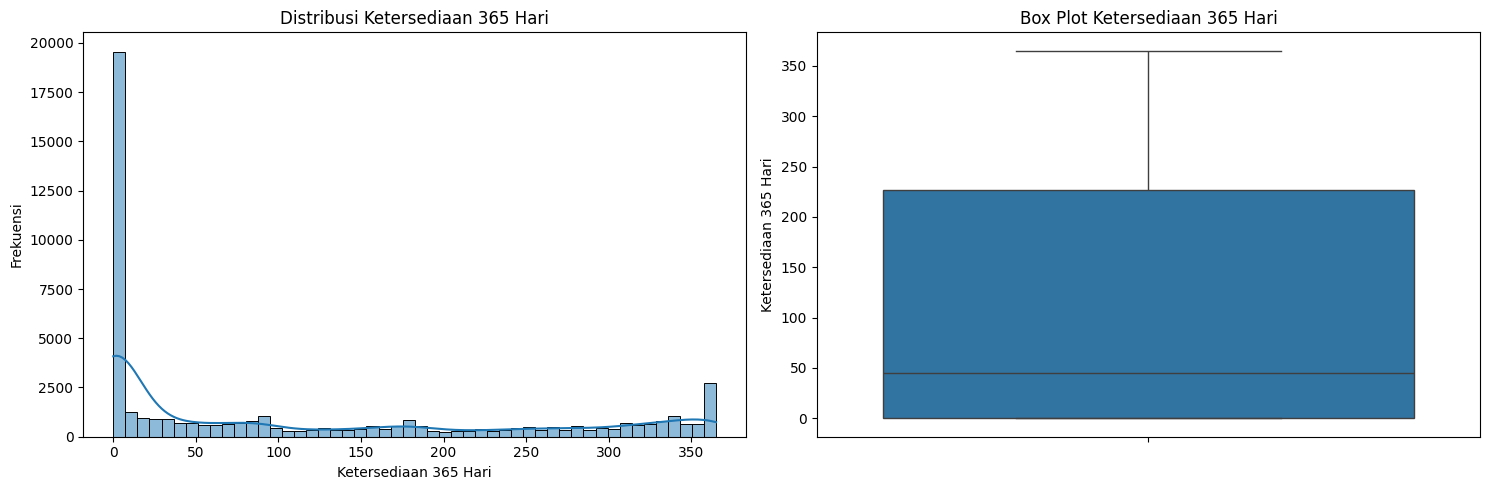

Plot distribusi ketersediaan 365 hari telah dibuat dan disimpan.


In [26]:
# Distribusi Ketersediaan 365 Hari
plt.figure(figsize=(15, 5))

# Histogram Ketersediaan 365 Hari
plt.subplot(1, 2, 1)
sns.histplot(df['availability_365'], bins=50, kde=True)
plt.title('Distribusi Ketersediaan 365 Hari')
plt.xlabel('Ketersediaan 365 Hari')
plt.ylabel('Frekuensi')
plt.savefig('distribusi_ketersediaan_365_histogram.png')

# Box Plot Ketersediaan 365 Hari
plt.subplot(1, 2, 2)
sns.boxplot(y=df['availability_365'])
plt.title('Box Plot Ketersediaan 365 Hari')
plt.ylabel('Ketersediaan 365 Hari')
plt.savefig('distribusi_ketersediaan_365_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi ketersediaan 365 hari telah dibuat dan disimpan.")

###### 4.1.6. Distribusi Jumlah Listing Host yang Dihitung (calculated_host_listings_count)

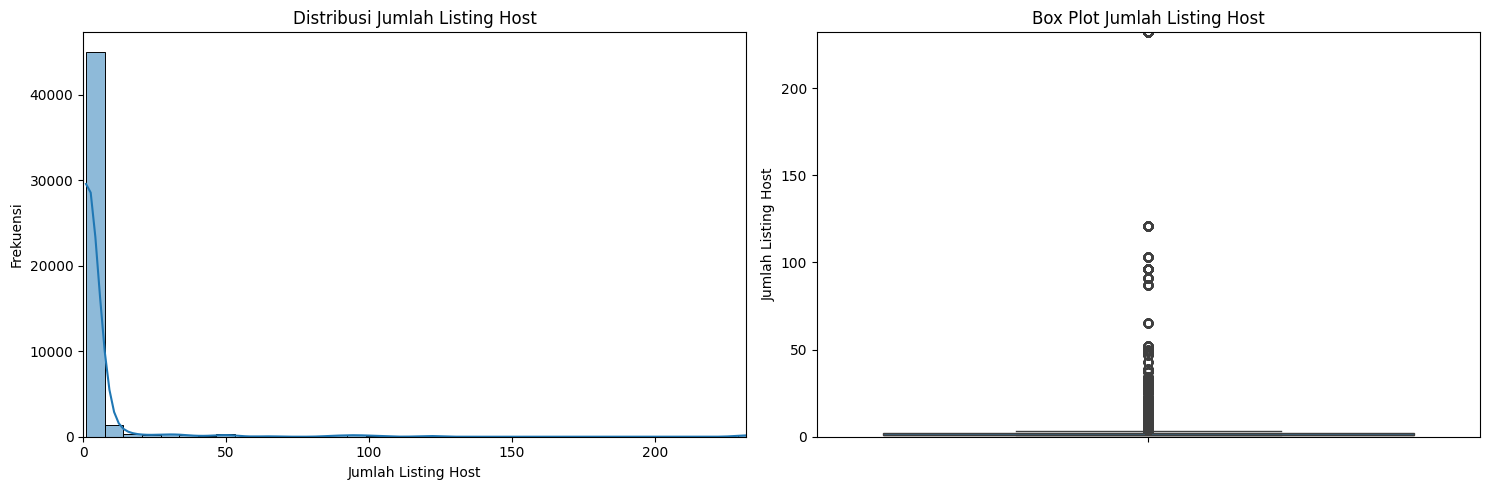

Plot distribusi jumlah listing host telah dibuat dan disimpan.


In [27]:
# Distribusi Jumlah Listing Host yang Dihitung
plt.figure(figsize=(15, 5))

# Histogram Jumlah Listing Host yang Dihitung
plt.subplot(1, 2, 1)
sns.histplot(df['calculated_host_listings_count'], bins=50, kde=True)
plt.title('Distribusi Jumlah Listing Host')
plt.xlabel('Jumlah Listing Host')
plt.ylabel('Frekuensi')
plt.xlim(0, df['calculated_host_listings_count'].quantile(0.99))
plt.savefig('distribusi_jumlah_listing_host_histogram.png')

# Box Plot Jumlah Listing Host yang Dihitung
plt.subplot(1, 2, 2)
sns.boxplot(y=df['calculated_host_listings_count'])
plt.title('Box Plot Jumlah Listing Host')
plt.ylabel('Jumlah Listing Host')
plt.ylim(0, df['calculated_host_listings_count'].quantile(0.99))
plt.savefig('distribusi_jumlah_listing_host_boxplot.png')
plt.tight_layout()
plt.show()
print("Plot distribusi jumlah listing host telah dibuat dan disimpan.")

#### 4.2 Jumlah Fitur Kategorikal

###### 4.2.1. Jumlah Listing berdasarkan Grup Lingkungan (neighbourhood_group)

<ipython-input-28-f85f123fcd55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='viridis')


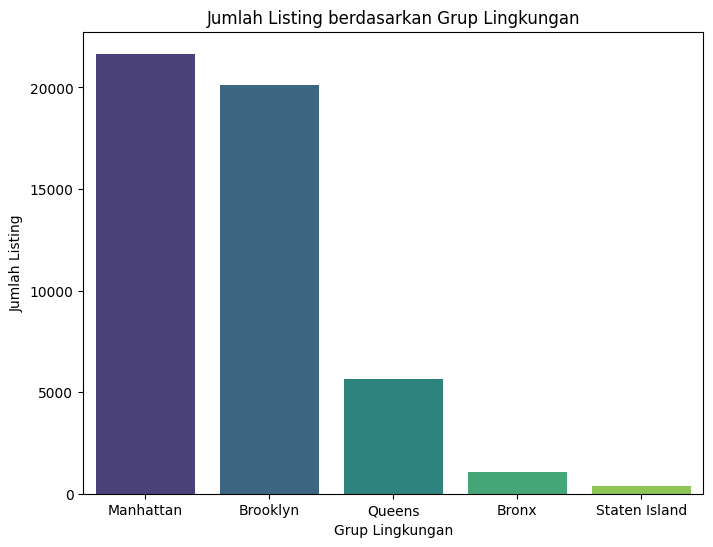

Plot jumlah listing berdasarkan grup lingkungan telah dibuat dan disimpan.


In [28]:
# Grup Lingkungan
plt.figure(figsize=(8, 6))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index, palette='viridis')
plt.title('Jumlah Listing berdasarkan Grup Lingkungan')
plt.xlabel('Grup Lingkungan')
plt.ylabel('Jumlah Listing')
plt.savefig('jumlah_listing_grup_lingkungan.png')
plt.show()
print("Plot jumlah listing berdasarkan grup lingkungan telah dibuat dan disimpan.")

###### 4.2.2. Jumlah Listing berdasarkan Tipe Kamar (room_type)

<ipython-input-29-902d48628a78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='magma')


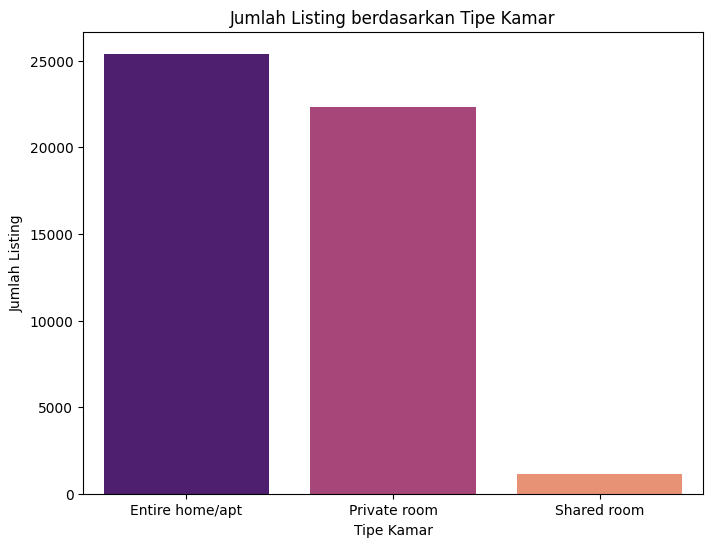

Plot jumlah listing berdasarkan tipe kamar telah dibuat dan disimpan.


In [29]:
# Tipe Kamar
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='magma')
plt.title('Jumlah Listing berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Listing')
plt.savefig('jumlah_listing_tipe_kamar.png')
plt.show()
print("Plot jumlah listing berdasarkan tipe kamar telah dibuat dan disimpan.")

#### 4.3 Hubungan Antar Fitur

###### 4.3.1. Distribusi Harga berdasarkan Grup Lingkungan (price vs neighbourhood_group)

<ipython-input-30-b4ab843569d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='viridis')


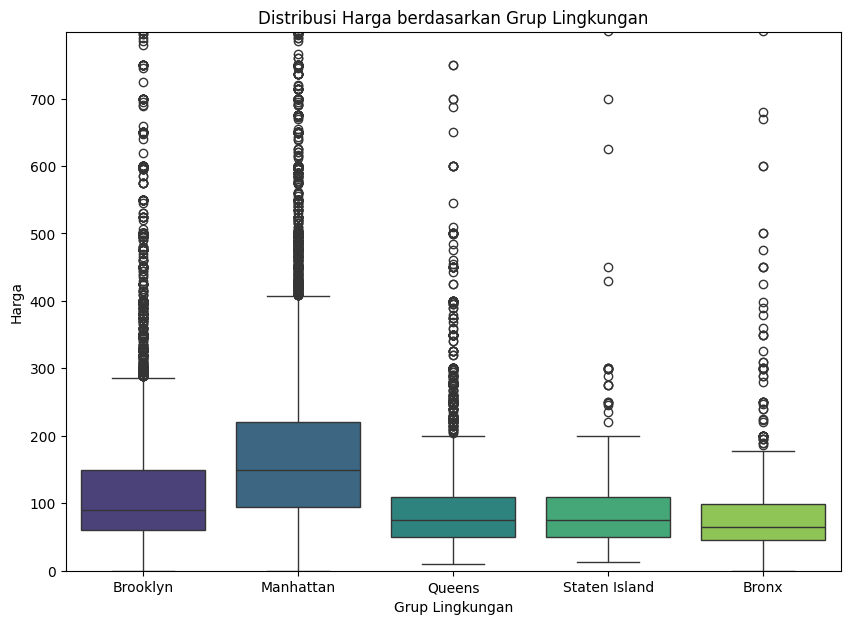

Plot harga berdasarkan grup lingkungan telah dibuat dan disimpan.


In [30]:
# Harga vs. Grup Lingkungan (Box Plot)
plt.figure(figsize=(10, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='viridis')
plt.title('Distribusi Harga berdasarkan Grup Lingkungan')
plt.xlabel('Grup Lingkungan')
plt.ylabel('Harga')
plt.ylim(0, df['price'].quantile(0.99)) # Batasi sumbu y untuk visualisasi yang lebih baik
plt.savefig('harga_berdasarkan_grup_lingkungan_boxplot.png')
plt.show()
print("Plot harga berdasarkan grup lingkungan telah dibuat dan disimpan.")

###### 4.3.2. Distribusi Harga berdasarkan Tipe Kamar (price vs room_type)

<ipython-input-32-0b6357250ebe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df, palette='magma')


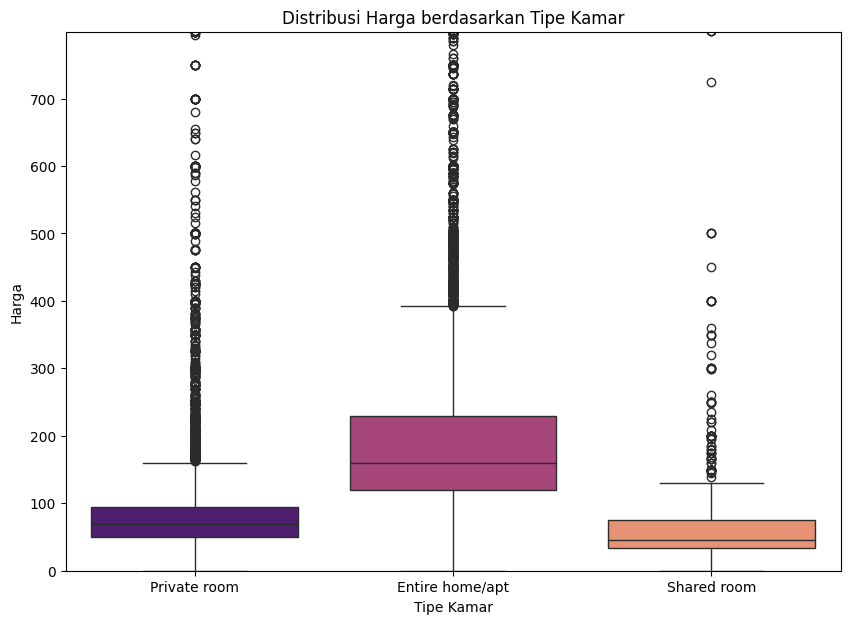

Plot harga berdasarkan tipe kamar telah dibuat dan disimpan.


In [32]:
# Harga vs. Tipe Kamar (Box Plot)
plt.figure(figsize=(10, 7))
sns.boxplot(x='room_type', y='price', data=df, palette='magma')
plt.title('Distribusi Harga berdasarkan Tipe Kamar')
plt.xlabel('Tipe Kamar')
plt.ylabel('Harga')
plt.ylim(0, df['price'].quantile(0.99)) # Batasi sumbu y untuk visualisasi yang lebih baik
plt.savefig('harga_berdasarkan_tipe_kamar_boxplot.png')
plt.show()
print("Plot harga berdasarkan tipe kamar telah dibuat dan disimpan.")

###### 4.3.3. Harga vs. Minimum Malam Menginap (price vs minimum_nights)

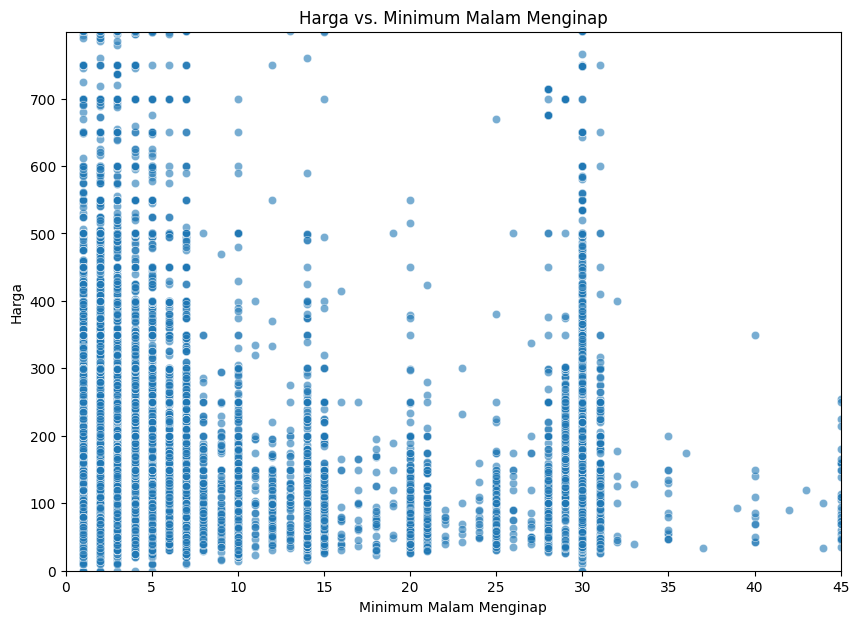

Plot harga vs. minimum malam menginap telah dibuat dan disimpan.


In [31]:
# Harga vs. Minimum Malam Menginap (Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='minimum_nights', y='price', data=df, alpha=0.6)
plt.title('Harga vs. Minimum Malam Menginap')
plt.xlabel('Minimum Malam Menginap')
plt.ylabel('Harga')
plt.xlim(0, df['minimum_nights'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.savefig('harga_vs_minimum_malam_scatterplot.png')
plt.show()
print("Plot harga vs. minimum malam menginap telah dibuat dan disimpan.")

###### 4.3.4. Harga vs. Jumlah Ulasan (price vs number_of_reviews)

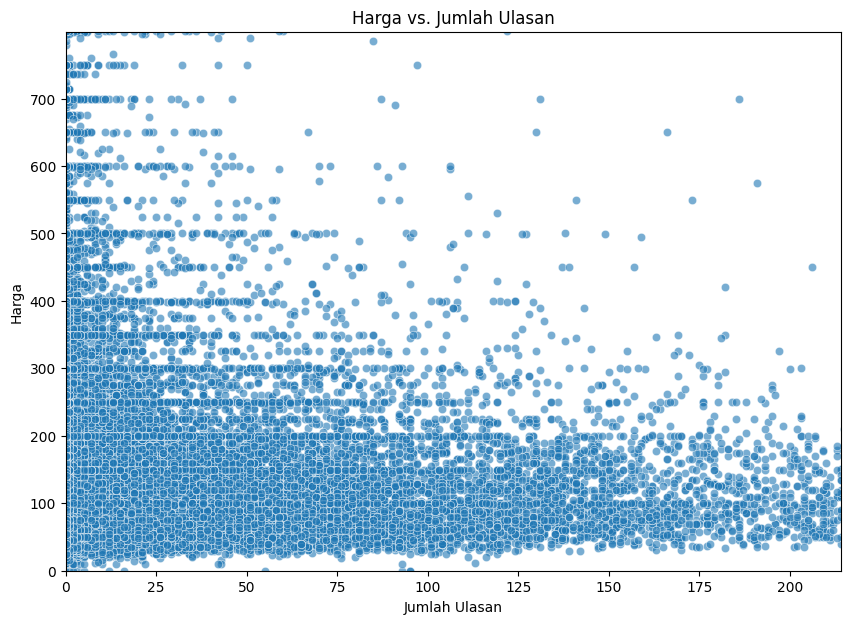

Plot harga vs. jumlah ulasan telah dibuat dan disimpan.


In [34]:
# Harga vs. Jumlah Ulasan (Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title('Harga vs. Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Harga')
plt.xlim(0, df['number_of_reviews'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.savefig('harga_vs_jumlah_ulasan_scatterplot.png')
plt.show()
print("Plot harga vs. jumlah ulasan telah dibuat dan disimpan.")

###### 4.3.5. Ulasan Per Bulan vs. Jumlah Ulasan (reviews_per_month vs number_of_reviews)

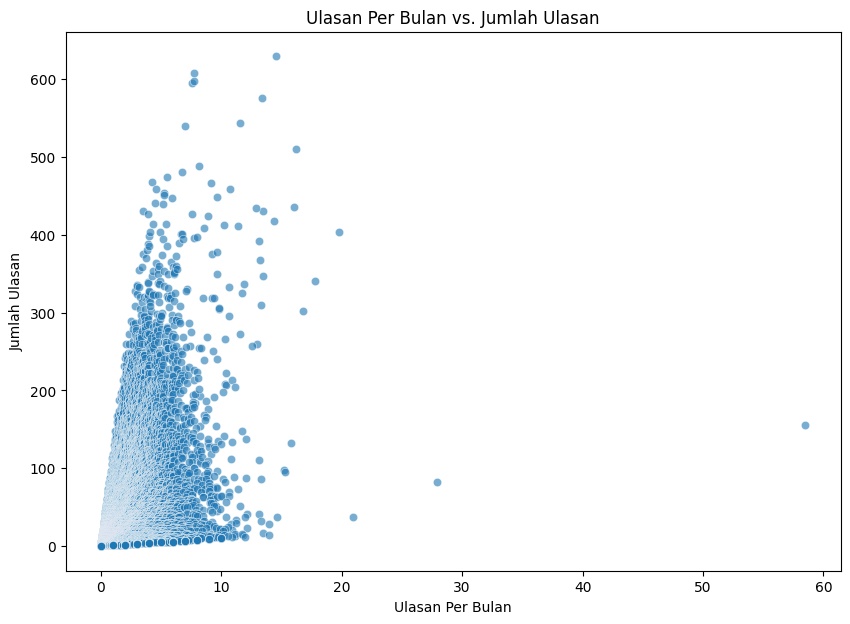

Plot ulasan per bulan vs. jumlah ulasan telah dibuat dan disimpan.


In [33]:
# Ulasan Per Bulan vs. Jumlah Ulasan (Scatter Plot)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', data=df, alpha=0.6)
plt.title('Ulasan Per Bulan vs. Jumlah Ulasan')
plt.xlabel('Ulasan Per Bulan')
plt.ylabel('Jumlah Ulasan')
plt.savefig('ulasan_per_bulan_vs_jumlah_ulasan_scatterplot.png')
plt.show()
print("Plot ulasan per bulan vs. jumlah ulasan telah dibuat dan disimpan.")

###### 4.3.6. Distribusi Geografis Listing (longitude vs latitude)

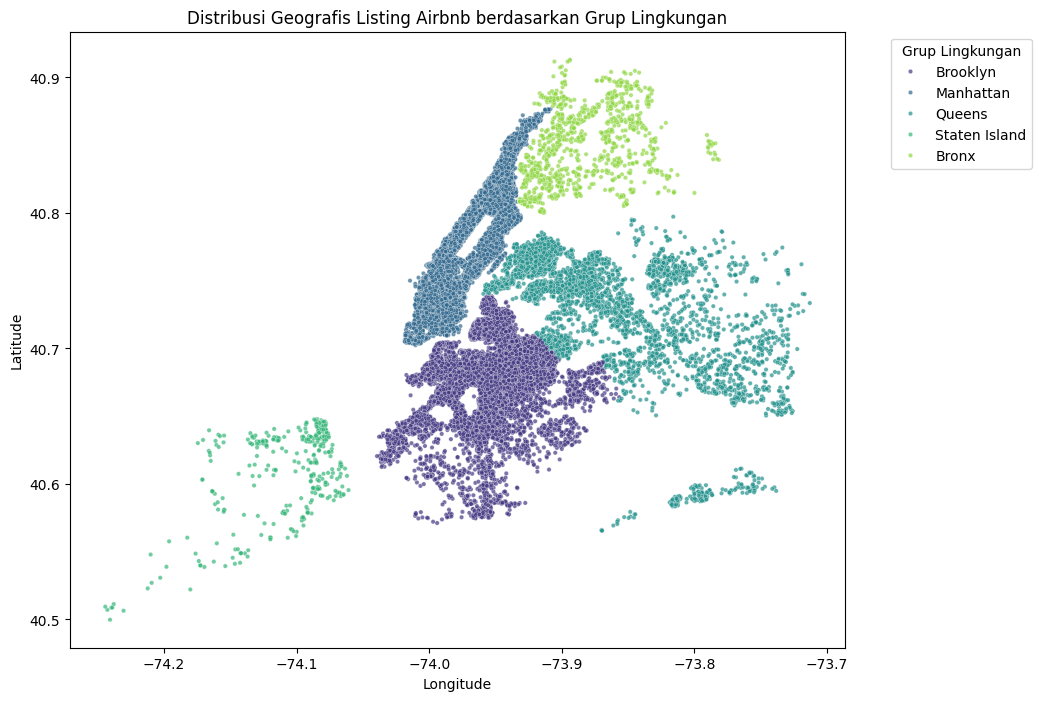

Plot distribusi geografis telah dibuat dan disimpan.


In [35]:
# Distribusi Geografis Listing
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, s=10, alpha=0.7, palette='viridis')
plt.title('Distribusi Geografis Listing Airbnb berdasarkan Grup Lingkungan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Grup Lingkungan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('distribusi_geografis.png')
plt.show()
print("Plot distribusi geografis telah dibuat dan disimpan.")

## 5. Temuan Menarik

In [36]:
print("\n--- Laporan Singkat: Wawasan dari Analisis Dataset Airbnb ---")
print("Analisis ini memberikan gambaran komprehensif tentang dataset Airbnb, mengungkap karakteristik utama dan tren daftar properti.")

print("\n**1. Kelengkapan & Kualitas Data:**")
print("- Dataset ini berisi 16 kolom dan 48895 entri.")
print("- Kolom `name`, `host_name`, `last_review`, dan `reviews_per_month` awalnya memiliki nilai yang hilang.")
print("- Nilai hilang pada `reviews_per_month` (20.56%) diisi dengan 0, mengasumsikan daftar properti tanpa ulasan berarti tidak ada ulasan per bulan.")
print("- Nilai hilang pada `name` (0.04%) dan `host_name` (0.05%) diisi dengan 'unknown'.")
print("- Kolom `last_review` (20.56% hilang) tidak digunakan dalam analisis ini, tetapi dapat berguna untuk wawasan temporal (misalnya, aktivitas daftar properti).")

print("\n**2. Karakteristik Listing Utama:**")
print("- **Harga:** Distribusi harga sangat miring ke kanan, menunjukkan banyak listing terjangkau dan beberapa yang sangat mahal. Sebagian besar listing dihargai di bawah $200. Terdapat outlier signifikan, dengan harga mencapai $10000. Median harga adalah $106, sementara rata-ratanya $152.72, dipengaruhi oleh listing berharga tinggi ini.")
print("- **Minimum Malam Menginap:** Sebagian besar listing memiliki minimum menginap 1 atau 2 malam. Namun, ada listing yang membutuhkan masa inap yang jauh lebih lama, dengan maksimum 1250 malam, menunjukkan berbagai jenis penyewaan mulai dari jangka pendek hingga jangka panjang.")
print("- **Jumlah Ulasan:** Sebagian besar listing tidak memiliki ulasan, tetapi beberapa telah menerima ratusan. Ini menunjukkan tingkat popularitas dan keterlibatan yang bervariasi.")
print("- **Ulasan Per Bulan:** Demikian pula, `reviews_per_month` menunjukkan konsentrasi yang kuat pada 0 (setelah imputasi), mencerminkan listing tanpa ulasan. Untuk listing yang memiliki ulasan, distribusinya miring ke tingkat ulasan bulanan yang lebih rendah.")
print("- **Ketersediaan 365 Hari:** Banyak listing memiliki ketersediaan tinggi (mendekati 365 hari), menunjukkan bahwa mereka terus tersedia untuk pemesanan, sementara yang lain memiliki ketersediaan terbatas.")
print("- **Jumlah Listing Host:** Sebagian besar host hanya memiliki satu listing, tetapi beberapa host mengelola sejumlah besar properti (hingga 327), menunjukkan host profesional atau perusahaan manajemen properti.")

print("\n**3. Distribusi Geografis dan Tipe Kamar:**")
print("- **Grup Lingkungan:** Manhattan dan Brooklyn mendominasi jumlah listing, diikuti oleh Queens, dan kemudian jauh lebih sedikit di The Bronx dan Staten Island. Distribusi geografis ini secara langsung memengaruhi ketersediaan dan dinamika harga.")
print("- **Tipe Kamar:** 'Seluruh rumah/apartemen' adalah jenis kamar yang paling umum, diikuti oleh 'Kamar pribadi', dan 'Kamar bersama' adalah yang paling jarang. Ini mencerminkan preferensi umum untuk privasi di kalangan wisatawan.")

print("\n**4. Hubungan dan Tren:**")
print("- **Harga berdasarkan Grup Lingkungan:** Manhattan umumnya memiliki harga rata-rata tertinggi, diikuti oleh Brooklyn. The Bronx dan Staten Island cenderung memiliki harga yang lebih rendah. Ini sejalan dengan perkiraan biaya hidup dan permintaan pariwisata di area tersebut.")
print("- **Harga berdasarkan Tipe Kamar:** 'Seluruh rumah/apartemen' secara signifikan lebih mahal daripada 'Kamar pribadi', yang pada gilirannya lebih mahal daripada 'Kamar bersama'. Ini sudah diduga, karena privasi dan ruang yang lebih besar menuntut harga yang lebih tinggi.")
print("- **Harga vs. Minimum Malam Menginap:** Tidak ada hubungan linier yang kuat antara harga dan minimum malam menginap, tetapi beberapa listing yang sangat mahal cenderung memiliki persyaratan masa inap minimum yang lebih lama. Banyak persewaan jangka pendek ada di berbagai titik harga.")
print("- **Harga vs. Jumlah Ulasan:** Tidak ada korelasi positif yang kuat antara harga dan jumlah ulasan. Banyak listing mahal memiliki sedikit ulasan, sementara beberapa listing dengan harga sedang memiliki banyak ulasan, menunjukkan bahwa ulasan lebih menunjukkan popularitas/lalu lintas daripada harga saja.")
print("- **Ulasan Per Bulan vs. Jumlah Ulasan:** Seperti yang diharapkan, ada korelasi positif yang kuat: listing dengan lebih banyak `reviews_per_month` juga cenderung memiliki `number_of_reviews` keseluruhan yang lebih tinggi.")
print("- **Distribusi Geografis:** Scatter plot latitude dan longitude dengan jelas memvisualisasikan kepadatan listing di Manhattan, Brooklyn, dan Queens, menyoroti inti perkotaan dari dataset.")

print("\n**Gambaran Besar Keseluruhan:**")
print("Dataset ini memberikan gambaran yang kaya tentang pasar Airbnb, yang sangat terkonsentrasi di New York City (terutama Manhattan dan Brooklyn). Ini menyoroti dominasi jenis kamar tertentu ('Seluruh rumah/apartemen', 'Kamar pribadi') dan variasi harga yang luas, didorong oleh lokasi dan jenis akomodasi. Kehadiran banyak host dengan listing tunggal dibandingkan dengan beberapa host dengan banyak listing menunjukkan campuran hosting kasual dan profesional. Outlier dalam harga dan minimum malam menginap menunjukkan penawaran niche atau mewah di samping persewaan jangka pendek yang lebih umum dan terjangkau.")


--- Laporan Singkat: Wawasan dari Analisis Dataset Airbnb ---
Analisis ini memberikan gambaran komprehensif tentang dataset Airbnb, mengungkap karakteristik utama dan tren daftar properti.

**1. Kelengkapan & Kualitas Data:**
- Dataset ini berisi 16 kolom dan 48895 entri.
- Kolom `name`, `host_name`, `last_review`, dan `reviews_per_month` awalnya memiliki nilai yang hilang.
- Nilai hilang pada `reviews_per_month` (20.56%) diisi dengan 0, mengasumsikan daftar properti tanpa ulasan berarti tidak ada ulasan per bulan.
- Nilai hilang pada `name` (0.04%) dan `host_name` (0.05%) diisi dengan 'unknown'.
- Kolom `last_review` (20.56% hilang) tidak digunakan dalam analisis ini, tetapi dapat berguna untuk wawasan temporal (misalnya, aktivitas daftar properti).

**2. Karakteristik Listing Utama:**
- **Harga:** Distribusi harga sangat miring ke kanan, menunjukkan banyak listing terjangkau dan beberapa yang sangat mahal. Sebagian besar listing dihargai di bawah $200. Terdapat outlier signifikan, d